### Importing libraries used

In [116]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import re
import matplotlib.pylab as plt
import seaborn as sns

### Reading a csv file

Source of the data: https://www.askamanager.org/2021/04/how-much-money-do-you-make-4.html

In [117]:
salaries_raw = pd.read_csv("Ask A Manager Salary Survey 2021 (Responses) - Form Responses 1.csv")

In [118]:
salaries_raw.head()

,Timestamp,How old are you?,What industry do you work in?,Job title,"If your job title needs additional context, please clarify here:","What is your annual salary? (You'll indicate the currency in a later question. If you are part-time or hourly, please enter an annualized equivalent -- what you would earn if you worked the job 40 hours a week, 52 weeks a year.)","How much additional monetary compensation do you get, if any (for example, bonuses or overtime in an average year)? Please only include monetary compensation here, not the value of benefits.",Please indicate the currency,"If ""Other,"" please indicate the currency here:","If your income needs additional context, please provide it here:",What country do you work in?,"If you're in the U.S., what state do you work in?",What city do you work in?,How many years of professional work experience do you have overall?,How many years of professional work experience do you have in your field?,What is your highest level of education completed?,What is your gender?,What is your race? (Choose all that apply.)
0,4/27/2021 11:02:10,25-34,Education (Higher Education),Research and Instruction Librarian,NaN,"55,000",0.0,USD,NaN,NaN,United States,Massachusetts,Boston,5-7 years,5-7 years,Master's degree,Woman,White
1,4/27/2021 11:02:22,25-34,Computing or Tech,Change & Internal Communications Manager,NaN,"54,600",4000.0,GBP,NaN,NaN,United Kingdom,NaN,Cambridge,8 - 10 years,5-7 years,College degree,Non-binary,White
2,4/27/2021 11:02:38,25-34,"Accounting, Banking & Finance",Marketing Specialist,NaN,"34,000",NaN,USD,NaN,NaN,US,Tennessee,Chattanooga,2 - 4 years,2 - 4 years,College degree,Woman,White
3,4/27/2021 11:02:41,25-34,Nonprofits,Program Manager,NaN,"62,000",3000.0,USD,NaN,NaN,USA,Wisconsin,Milwaukee,8 - 10 years,5-7 years,College degree,Woman,White
4,4/27/2021 11:02:42,25-34,"Accounting, Banking & Finance",Accounting Manager,NaN,"60,000",7000.0,USD,NaN,NaN,US,South Carolina,Greenville,8 - 10 years,5-7 years,College degree,Woman,White


In [119]:
salaries_raw.columns.values

array(['Timestamp', 'How old are you?', 'What industry do you work in?',
       'Job title',
       'If your job title needs additional context, please clarify here:',
       "What is your annual salary? (You'll indicate the currency in a later question. If you are part-time or hourly, please enter an annualized equivalent -- what you would earn if you worked the job 40 hours a week, 52 weeks a year.)",
       'How much additional monetary compensation do you get, if any (for example, bonuses or overtime in an average year)? Please only include monetary compensation here, not the value of benefits.',
       'Please indicate the currency',
       'If "Other," please indicate the currency here: ',
       'If your income needs additional context, please provide it here:',
       'What country do you work in?',
       "If you're in the U.S., what state do you work in?",
       'What city do you work in?',
       'How many years of professional work experience do you have overall?',
       

In [120]:
salaries_raw.shape

(27925, 18)

In [121]:
salaries_raw.isna().sum()

Timestamp                                                                                                                                                                                                                                   0
How old are you?                                                                                                                                                                                                                            0
What industry do you work in?                                                                                                                                                                                                              72
Job title                                                                                                                                                                                                                                   0
If your job title needs additional context, plea

In [122]:
cols_dict = {
    'Timestamp' : "Timestamp", 
    'How old are you?' : "Age", 
    'What industry do you work in?' : "Industry",
    'Job title' : "Job_title",
    'If your job title needs additional context, please clarify here:' : "Job_title_context",
    "What is your annual salary? (You'll indicate the currency in a later question. If you are part-time or hourly, please enter an annualized equivalent -- what you would earn if you worked the job 40 hours a week, 52 weeks a year.)" : "Salary_annually", 
    'How much additional monetary compensation do you get, if any (for example, bonuses or overtime in an average year)? Please only include monetary compensation here, not the value of benefits.' : "Salary_extra_payments",
    'Please indicate the currency' : "Currency",
    'If "Other," please indicate the currency here: ' : "Currency_others",
    'If your income needs additional context, please provide it here:' : "Salary_additional_context", 
    'What country do you work in?' : "Country",
    "If you're in the U.S., what state do you work in?" : "US_State", 
    'What city do you work in?' : "City", 
    'How many years of professional work experience do you have overall?' : "Experience_total", 
    'How many years of professional work experience do you have in your field?' : "Experience_field", 
    'What is your highest level of education completed?' : "Education_level", 
    'What is your gender?': "Gender", 
    'What is your race? (Choose all that apply.)' : "Race"}
 
    
# call rename () method
salaries_renamed = salaries_raw.rename(columns=cols_dict, inplace=False)
 


In [123]:
# Dictionary to rename columns of the dataframe
cols_dict = {
    'Timestamp': "Timestamp", 
    'How old are you?': "Age", 
    'What industry do you work in?': "Industry",
    'Job title': "Job_title",
    'If your job title needs additional context, please clarify here:': "Job_title_context",
    "What is your annual salary? (You'll indicate the currency in a later question. If you are part-time or hourly, please enter an annualized equivalent -- what you would earn if you worked the job 40 hours a week, 52 weeks a year.)": "Salary_annually", 
    'How much additional monetary compensation do you get, if any (for example, bonuses or overtime in an average year)? Please only include monetary compensation here, not the value of benefits.': "Salary_extra_payments",
    'Please indicate the currency': "Currency",
    'If "Other," please indicate the currency here: ': "Currency_others",
    'If your income needs additional context, please provide it here:': "Salary_additional_context", 
    'What country do you work in?': "Country",
    "If you're in the U.S., what state do you work in?": "US_State", 
    'What city do you work in?': "City", 
    'How many years of professional work experience do you have overall?': "Experience_total", 
    'How many years of professional work experience do you have in your field?': "Experience_field", 
    'What is your highest level of education completed?': "Education_level", 
    'What is your gender?': "Gender", 
    'What is your race? (Choose all that apply.)': "Race"
}
 
    
def rename_columns(dataframe: pd.DataFrame, columns_dict: dict) -> pd.DataFrame:
    """
    Rename columns of a pandas dataframe.
    
    Args:
    - dataframe: A pandas dataframe
    - columns_dict: A dictionary mapping old column names to new column names.
    
    Returns:
    - A pandas dataframe with the renamed columns.
    """
    return dataframe.rename(columns=columns_dict, inplace=False)
 
# Rename the columns of the dataframe
salaries_renamed = rename_columns(salaries_raw, cols_dict)


### Share of missing values

In [124]:
# Calculate share of missing values for each column in the dataframe 'salaries_renamed'
share_nas = pd.DataFrame(salaries_renamed.isna().sum() / salaries_renamed.shape[0])

# Reset the index and rename axis of the dataframe 'share_nas'
share_nas = pd.DataFrame(share_nas, index=list(share_nas.index.values))
share_nas = share_nas.rename_axis('Columns_names').reset_index()

# Rename the columns of 'share_nas'
share_nas.columns = ["Columns_names", "Share_of_NAs"]

# Sort the dataframe 'share_nas' by the column 'Share_of_NAs' in descending order and format the values in the 'Share_of_NAs' column
share_nas.sort_values(by = "Share_of_NAs", ascending = False).style.format({'Share_of_NAs': '{:,.2%}'.format})


,Columns_names,Share_of_NAs
8,Currency_others,99.29%
9,Salary_additional_context,89.14%
4,Job_title_context,74.12%
6,Salary_extra_payments,25.95%
11,US_State,17.83%
15,Education_level,0.76%
17,Race,0.60%
16,Gender,0.59%
12,City,0.27%
2,Industry,0.26%


In [125]:
# Response from chatGPT
def missing_percentage(df):
    total = df.isnull().sum().sort_values(ascending = False)
    percent = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending = False)
    return pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

missing_percentage(salaries_renamed)

,Total,Percent
Currency_others,27728,99.294539
Salary_additional_context,24891,89.135184
Job_title_context,20699,74.123545
Salary_extra_payments,7247,25.951656
US_State,4978,17.826321
Education_level,212,0.759176
Race,168,0.601611
Gender,165,0.590868
City,75,0.268577
Industry,72,0.257833


In [126]:
salaries_renamed = salaries_renamed.dropna(subset = ['Education_level', 'Race', 'Gender', 'Industry', "Experience_field", "Experience_total"])

In [127]:
salaries_renamed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27414 entries, 0 to 27924
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Timestamp                  27414 non-null  object 
 1   Age                        27414 non-null  object 
 2   Industry                   27414 non-null  object 
 3   Job_title                  27414 non-null  object 
 4   Job_title_context          7126 non-null   object 
 5   Salary_annually            27414 non-null  object 
 6   Salary_extra_payments      20369 non-null  float64
 7   Currency                   27414 non-null  object 
 8   Currency_others            189 non-null    object 
 9   Salary_additional_context  3001 non-null   object 
 10  Country                    27414 non-null  object 
 11  US_State                   22567 non-null  object 
 12  City                       27339 non-null  object 
 13  Experience_total           27414 non-null  obj

### Notes
Points to do:
It's possible to separate observations with Manager, Director, Specialst, Coordinator, President etc. in titles
There are 14280 different job titles so it would be worth it to separarte some and throw the part to Others category


### Country handling

In [128]:
def find_regex_replace(regex, replacement, column_series):
    return column_series.apply(lambda x: replacement if bool(re.search(pattern=str(regex), string=str(x))) else str(x))

In [129]:
# to be uncommented 
pd.options.mode.chained_assignment = None
salaries_renamed["Country_original"] = salaries_renamed["Country"]
# salaries_renamed["Country"] = salaries_renamed["Country_original"]

In [130]:
#salaries_renamed.Country.value_counts()[salaries_renamed.Country.value_counts() <]
salaries_renamed["Country"] = salaries_renamed["Country"].str.upper().str.strip().str.replace("[^A-Z ]", "", regex = True)
salaries_renamed["Country"] = find_regex_replace(regex = "^AUSTRA", replacement = "AUSTRALIA", column_series = salaries_renamed["Country"]) 
salaries_renamed["Country"] = find_regex_replace(regex = "RUSSIA", replacement = "ROSJA", column_series = salaries_renamed["Country"]) 
salaries_renamed["Country"] = find_regex_replace(regex = "^US|U.S|UN.*STA|FRANSISCO|^AMERI|UNI.*S.*S$|CALIFORN|VIRGINIA|AMERICA$|THE US", replacement = "UNITED STATES", column_series = salaries_renamed["Country"]) 
salaries_renamed["Country"] = find_regex_replace(regex = "CANAD|CSNAD", replacement = "CANADA", column_series = salaries_renamed["Country"]) 
salaries_renamed["Country"] = find_regex_replace(regex = "^CAN!", replacement = "CANADA", column_series = salaries_renamed["Country"]) 
salaries_renamed["Country"] = find_regex_replace(regex = "BRASIL", replacement = "BRAZIL", column_series = salaries_renamed["Country"]) 
salaries_renamed["Country"] = find_regex_replace(regex = "CZECHIA", replacement = "CZECH REPUBLIC", column_series = salaries_renamed["Country"]) 
salaries_renamed["Country"] = find_regex_replace(regex = "DANMARK", replacement = "DENMARK", column_series = salaries_renamed["Country"]) 
salaries_renamed["Country"] = find_regex_replace(regex = "ENGLAN|UK|NORTHERN IRELAND|SCOTLAND|UNI.*KIN|BRITAIN|WALES|JERSEY", replacement = "UNITED KINGDOM", column_series = salaries_renamed["Country"]) 
salaries_renamed["Country"] = find_regex_replace(regex = "HONG KON", replacement = "HONG KONG", column_series = salaries_renamed["Country"]) 
salaries_renamed["Country"] = find_regex_replace(regex = "ITALY", replacement = "ITALY", column_series = salaries_renamed["Country"]) 
salaries_renamed["Country"] = find_regex_replace(regex = "LUXEM", replacement = "LUXEMBOURG", column_series = salaries_renamed["Country"]) 
salaries_renamed["Country"] = find_regex_replace(regex = "CHINA", replacement = "CHINA", column_series = salaries_renamed["Country"]) 
salaries_renamed["Country"] = find_regex_replace(regex = "JAPAN", replacement = "JAPAN", column_series = salaries_renamed["Country"]) 
salaries_renamed["Country"] = find_regex_replace(regex = "MXICO", replacement = "MEXICO", column_series = salaries_renamed["Country"]) 
salaries_renamed["Country"] = find_regex_replace(regex = "NEDER|^NL$|NETHER", replacement = "NETHERLANDS", column_series = salaries_renamed["Country"]) 
salaries_renamed["Country"] = find_regex_replace(regex = "^NZ$|NEW ZEALAND", replacement = "NEW ZEALAND", column_series = salaries_renamed["Country"]) 
salaries_renamed["Country"] = find_regex_replace(regex = "PANAM", replacement = "PANAMA", column_series = salaries_renamed["Country"]) 
salaries_renamed["Country"] = find_regex_replace(regex = "^UA|EMIRATES", replacement = "UNITED ARAB EMIRATES", column_series = salaries_renamed["Country"]) 
salaries_renamed["Country"] = find_regex_replace(regex = "AUSTRIA", replacement = "AUSTRIA", column_series = salaries_renamed["Country"])
salaries_renamed["Country"] = find_regex_replace(regex = "ROSJA", replacement = "RUSSIA", column_series = salaries_renamed["Country"]) 
#salaries_renamed["Country"] = find_regex_replace(regex = "🇺🇸", replacement = "USA", column_series = salaries_renamed["Country"]) 

In [131]:
salaries_renamed["Country"] = salaries_renamed["Country"].str.title()

In [132]:
pd.set_option('display.max_rows', 100)
country_matches = (salaries_renamed.groupby(["Country_original", "Country"])["Country"].count()
 .to_frame(name = "Counts").
 sort_values(by = "Country")
 .reset_index(level=["Country_original", "Country"])
)#.iloc[314,]
country_matches

,Country_original,Country,Counts
0,🇺🇸,,4
1,Afghanistan,Afghanistan,1
2,Africa,Africa,1
3,Argentina,Argentina,5
4,ARGENTINA BUT MY ORG IS IN THAILAND,Argentina But My Org Is In Thailand,1
...,...,...,...
358,"We don't get raises, we get quarterly bonuses,...",We Dont Get Raises We Get Quarterly Bonuses Bu...,1
359,Worldwide (based in US but short term trips ar...,Worldwide Based In Us But Short Term Trips Aro...,1
360,Y,Y,1
361,"$2,175.84/year is deducted for benefits",Year Is Deducted For Benefits,1


In [133]:
#salaries_renamed.Country.str.rstrip().str.upper().unique()

salaries_group_country = (salaries_renamed.groupby(["Country"])["Country"].count()
 .to_frame(name = "Counts").
 sort_values(by = "Country")
 .reset_index(level=["Country"])
)
#Filtering entries where given countries is less than 5
salaries_renamed = salaries_renamed[salaries_renamed.Country.isin(salaries_group_country[salaries_group_country.Counts >= 5].Country.values)]

In [134]:
salaries_group_country_counts = (salaries_renamed.groupby(["Country"])["Country"].count()
.to_frame(name = "Counts")
 .reset_index(level=["Country"])
 .sort_values(by = "Counts", ascending = False)
)

### Count values map

If there are multiple states given, the first one is taken

In [135]:
salaries_renamed.US_State = salaries_renamed.US_State.apply(
    lambda x: x.split(sep=",")[0] if bool(re.search(pattern=str(","), string=str(x))) 
    else x
)#.value_counts()

### Classifying industries

In [136]:
(salaries_renamed.Industry.value_counts()
 .to_frame(name = "Counts").reset_index()
 .rename(columns = {"index":"Industry"})
 .sort_values(by = "Industry", ascending = True).reset_index(drop = True)).head(n = 50)

,Industry,Counts
0,Buyer,1
1,Veterinary medicine,1
2,"""Government Relations"" (Lobbying)",1
3,Academia,4
4,Academia - STEM,1
5,Academia / Research,1
6,Academia--cell and molecular biology,1
7,Academic Medicine,1
8,Academic Press Production,1
9,Academic Publishing,2


In [137]:
salaries_renamed["Industry_original"] = salaries_renamed["Industry"]
# salaries_renamed["Industry"] = salaries_renamed["Industry_original"]

In [138]:
salaries_renamed["Industry"] = salaries_renamed["Industry"].str.upper().str.strip().str.replace("[^A-Z ]", "", regex = True)

In [139]:
salaries_renamed["Industry"] = find_regex_replace(regex = str("FOOD"), replacement = "FOOD", column_series = salaries_renamed["Industry"]) 
salaries_renamed["Industry"] = find_regex_replace(regex = "GOV|POLITIC", replacement = "GOVERNMENTAL", column_series = salaries_renamed["Industry"]) 
salaries_renamed["Industry"] = find_regex_replace(regex = "FINAN|ACTUARIAL|PAYMENT|FINTECH", replacement = "FINANCE", column_series = salaries_renamed["Industry"]) 
salaries_renamed["Industry"] = find_regex_replace(regex = "RESEAR|HIGH.*EDU|SCIEN|ACADEM", replacement = "HIGHER EDUCATION", column_series = salaries_renamed["Industry"]) 
#salaries_renamed["Industry"] = find_regex_replace(regex = "TEACH|EDUC.*PRIM|^ED", replacement = "EDUCATION", column_series = salaries_renamed["Industry"]) 
salaries_renamed["Industry"] = find_regex_replace(regex = "TEACH|EDUC.*PRIM|^ED", replacement = "EDUCATION", column_series = salaries_renamed["Industry"]) 
salaries_renamed["Industry"] = find_regex_replace(regex = "MANUF|MFG", replacement = "MANUFACTURING", column_series = salaries_renamed["Industry"]) 
salaries_renamed["Industry"] = find_regex_replace(regex = "BIO.*TECH|BIOPH|PHARMA|COSMET", replacement = "BIOTECH&PHARMA", column_series = salaries_renamed["Industry"]) 
salaries_renamed["Industry"] = find_regex_replace(regex = "SOFTWARE|COMPUTING|^IT$", replacement = "COMPUTING&TECH", column_series = salaries_renamed["Industry"]) 
salaries_renamed["Industry"] = find_regex_replace(regex = "AGRICU", replacement = "AGRICULTURE", column_series = salaries_renamed["Industry"]) 
salaries_renamed["Industry"] = find_regex_replace(regex = "ARCHITECT|URBAN", replacement = "ARCHITECTURE", column_series = salaries_renamed["Industry"]) 
salaries_renamed["Industry"] = find_regex_replace(regex = "ADMINIST", replacement = "ADMINISTRATION", column_series = salaries_renamed["Industry"]) 
salaries_renamed["Industry"] = find_regex_replace(regex = "AUTO", replacement = "AUTOMOTIVE", column_series = salaries_renamed["Industry"]) 
salaries_renamed["Industry"] = find_regex_replace(regex = "LIBRA", replacement = "LIBRARIES", column_series = salaries_renamed["Industry"]) 
salaries_renamed["Industry"] = find_regex_replace(regex = "SALES", replacement = "SALES", column_series = salaries_renamed["Industry"]) 
salaries_renamed["Industry"] = find_regex_replace(regex = "LAW", replacement = "LAW", column_series = salaries_renamed["Industry"]) 
salaries_renamed["Industry"] = find_regex_replace(regex = "OIL|GAS", replacement = "ENERGY", column_series = salaries_renamed["Industry"]) 
salaries_renamed["Industry"] = find_regex_replace(regex = "CONSULT", replacement = "BUSINESS&CONSULTING", column_series = salaries_renamed["Industry"]) 
salaries_renamed["Industry"] = find_regex_replace(regex = "MEDIC|HEALTH|HOSPITAL", replacement = "HEALTH", column_series = salaries_renamed["Industry"]) 

In [140]:
industry_matches = (salaries_renamed.groupby(["Industry_original", "Industry"])["Industry"].count()
 .to_frame(name = "Counts")
 .sort_values(by = "Industry")
 .reset_index(level=["Industry_original", "Industry"])
)
(industry_matches
  .groupby(["Industry"])["Counts"].sum()
  .to_frame(name = "Counts")
  .sort_values(by = "Counts", ascending = False)
 .head(n = 30)
)

,Counts
Industry,
COMPUTING&TECH,4584
HIGHER EDUCATION,2687
NONPROFITS,2370
HEALTH,2167
GOVERNMENTAL,1918
FINANCE,1766
MANUFACTURING,1730
LAW,1110
MARKETING ADVERTISING PR,1098


In [141]:
salaries_group_industry = (salaries_renamed.groupby(["Industry"])["Industry"].count() 
                           .to_frame(name = "Counts")  
                           .sort_values(by = "Counts", ascending = False) 
                           .reset_index(level=["Industry"]))

salaries_group_industry.head(n = 50)

,Industry,Counts
0,COMPUTING&TECH,4584
1,HIGHER EDUCATION,2687
2,NONPROFITS,2370
3,HEALTH,2167
4,GOVERNMENTAL,1918
5,FINANCE,1766
6,MANUFACTURING,1730
7,LAW,1110
8,MARKETING ADVERTISING PR,1098
9,BUSINESS&CONSULTING,866


In [142]:
# salaries_renamed[salaries_renamed.Industry.isin(salaries_group_industry[salaries_group_industry.Counts < 20].Industry.values)]['Industry'] #= "OTHER"
salaries_renamed.loc[salaries_renamed.Industry.isin(salaries_group_industry[salaries_group_industry.Counts < 20].Industry.values), 'Industry'] = "OTHER"

In [143]:
salaries_renamed.Industry = salaries_renamed.Industry.str.title()

### Job position features

In [144]:
salaries_renamed["Job_title_original"] = salaries_renamed["Job_title"]
# salaries_renamed["Job_title"] = salaries_renamed["Job_title_original"]

In [145]:
salaries_renamed["Job_title"] = salaries_renamed["Job_title"].str.upper().str.strip()

Looking at Job_title_context

In [146]:
salaries_renamed.Job_title = salaries_renamed.Job_title.str.title().str.strip()

(salaries_renamed.groupby(["Job_title", "Job_title_context"])["Job_title"].count()
.to_frame(name = "Counts")
.reset_index(level=["Job_title",  "Job_title_context"])
.sort_values(by = "Counts", ascending = False)).head(n = 20)

,Job_title,Job_title_context,Counts
3846,Marketing Strategy Manager,In commercial real estate industry,10
1885,Development Officer,Fundraising,4
600,Associate,Attorney,4
3063,Human Resources Analyst,HR Business Partner,3
814,Attorney,Associate,3
542,Assistant Professor,tenure track,2
752,Associate Professor,Humanities,2
6180,Software Engineer,Rotational program for entry level engineers,2
39,Account Executive,Public Sector Account Executive,2
1361,Compliance Associate,Anti-money laundering,2


### Timestamp ditribution

In [147]:
salaries_renamed.Timestamp = pd.to_datetime(salaries_renamed.Timestamp)
salaries_renamed["Date"] = salaries_renamed.Timestamp.dt.strftime("%Y-%m-%d")

Let's filter all the after May 2021 because of inflation that can affect comparisons 

In [148]:
salaries_renamed = salaries_renamed[salaries_renamed.Timestamp < "2021-06-01"]

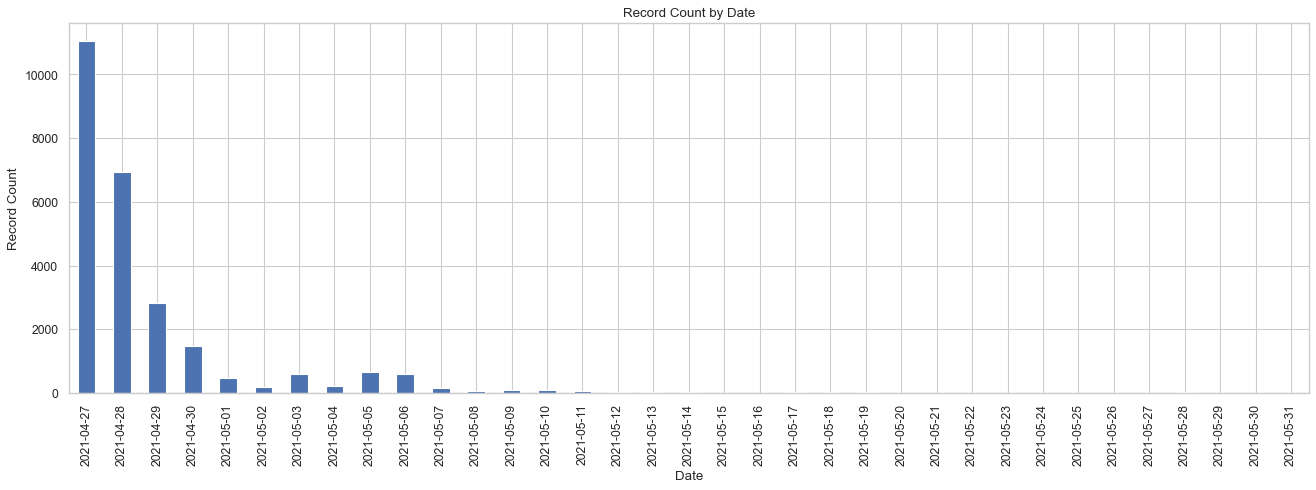

In [149]:
import matplotlib.pyplot as plt

# Set figure size and DPI
fig = plt.figure(figsize=(20, 6), dpi=80)

# Group by date and count the number of records in each date
date_grouped = salaries_renamed.Timestamp.groupby(salaries_renamed['Timestamp'].dt.to_period('D')).count()

# Plot the grouped data as a bar chart
date_grouped.plot(kind="bar")

# Add x-axis label
plt.xlabel('Date')

# Add y-axis label
plt.ylabel('Record Count')

# Add a title to the plot
plt.title('Record Count by Date')

# Show the plot
plt.show()


### Salaries preparation

In [150]:
salaries_renamed.Salary_extra_payments = salaries_renamed.Salary_extra_payments.fillna(0)

Data requested from https://app.freecurrencyapi.com/dashboard

In [151]:
import requests
from requests.structures import CaseInsensitiveDict
import pandas as pd

# Define the URL of the API endpoint
URL = "https://api.freecurrencyapi.com/v1/historical?apikey=MfhFIDkrj37M0NRsdRSLlzxDu9kuXBYG8XNn2jf0"

# Define the parameters for the API request
parameters = {
    "date_from" : "2021-04-27", 
    "date_to" : "2021-05-31", 
    "base_currency" : "USD"
}

# Make the API request
resp = requests.get(url = URL, params = parameters)

# Check the status code of the response to ensure it was successful
if resp.status_code != 200:
    print(f"Request failed with status code {resp.status_code}")
    exit(1)

# Load the response data as a JSON object
currency_data = resp.json()

# Normalize the data using Pandas and filter for data from 2021-04-27
currency_data_norm = pd.json_normalize(currency_data['data']).filter(regex = "2021-04-27")

# Rename the columns to remove the date and keep just the currency code
currency_data_norm.columns = [col[-3:] for col in currency_data_norm.columns.values]

# Transpose the data and reset the index, then rename the columns to "Currency" and "Currency_rate"
currency_data_norm = (currency_data_norm.transpose().
                      rename(columns = {0: "Currency_rate"}).
                      reset_index().
                      rename(columns = {"index":"Currency"}))

# Display the formatted data
print(currency_data_norm)


   Currency  Currency_rate
0       AUD        1.28728
1       BGN        1.61723
2       BRL        5.44909
3       CAD        1.23933
4       CHF        0.91401
5       CNY        6.48257
6       CZK       21.43784
7       DKK        6.15038
8       EUR        0.82720
9       GBP        0.71927
10      HKD        7.76252
11      HRK        6.24718
12      HUF      299.75394
13      IDR    14480.35765
14      ILS        3.24045
15      INR       74.58203
16      ISK      123.75244
17      JPY      108.75908
18      KRW     1109.40730
19      MXN       20.04531
20      MYR        4.09610
21      NOK        8.27159
22      NZD        1.38800
23      PHP       48.47068
24      PLN        3.77782
25      RON        4.07388
26      RUB       74.88814
27      SEK        8.37129
28      SGD        1.32629
29      THB       31.35084
30      TRY        8.19780
31      USD        1.00003
32      ZAR       14.36332


It's possible to adress currency better for different dates following this question on stackoverflow and melting this dataframe https://stackoverflow.com/questions/59550804/melt-column-by-substring-of-the-columns-name-in-pandas-python

In [152]:
#Change in Currency of Ausrtralia and New Zealand required
salaries_renamed[["Currency", "Country"]].value_counts()

Currency  Country       
USD       United States     21443
CAD       Canada             1538
GBP       United Kingdom     1486
AUD/NZD   Australia           352
EUR       Germany             171
          Ireland             112
AUD/NZD   New Zealand         109
EUR       Netherlands          73
          France               54
          Spain                40
CHF       Switzerland          32
SEK       Sweden               31
EUR       Belgium              30
JPY       Japan                20
USD       Canada               15
EUR       Austria              14
          Finland              14
USD       United Kingdom       13
Other     United States        13
ZAR       South Africa         13
EUR       Italy                12
Other     Malaysia             11
          Denmark              11
USD       Australia            10
Other     Norway                9
          India                 8
          Brazil                8
          Singapore             8
USD       Israel       

In [153]:
currency_condition = {
'AUD': salaries_renamed['Country'] == "AUSTRALIA",
'NZD': salaries_renamed['Country'] == "NEW ZEALAND"
#salaries_renamed['Currency_others'] : salaries_renamed['Currency'] == "Others"
}

salaries_renamed['Currency'] = np.select(
    list(currency_condition.values()), 
    list(currency_condition.keys()), 
    default=salaries_renamed['Currency']
)

In [154]:
salaries_renamed['Currency'] = pd.Series(np.select(
    [salaries_renamed['Currency'] == "Other"], 
    [salaries_renamed['Currency_others'].str.upper().str[:3]], 
    default=salaries_renamed['Currency']
))#.value_counts()

At this moment i take all the values but only for currencies that match easily

In [155]:
salaries_merged = salaries_renamed.merge(currency_data_norm, how = "inner", on = "Currency")

In [156]:
salaries_merged["Salary_annually"] = salaries_merged["Salary_annually"].str.replace(",", "").astype("float")

In [157]:
salaries_merged["Salary_annually_total"] = salaries_merged.Salary_annually + salaries_merged.Salary_extra_payments
salaries_merged["Salary_annually_total_USD"] = salaries_merged["Salary_annually_total"] / salaries_merged.Currency_rate

In [158]:
salaries_merged.sort_values(by = "Salary_annually_total_USD", ascending=False).head(n = 20)

,Timestamp,Age,Industry,Job_title,Job_title_context,Salary_annually,Salary_extra_payments,Currency,Currency_others,Salary_additional_context,...,Education_level,Gender,Race,Country_original,Industry_original,Job_title_original,Date,Currency_rate,Salary_annually_total,Salary_annually_total_USD
22160,2021-04-29 00:33:04,35-44,Media Digital,Toeic Test Developer,"Only for test-prep books, not the actual test",38000000.0,0.0,GBP,KRW,NaN,...,Master's degree,Other or prefer not to answer,White,South Korea,Media & Digital,TOEIC Test Developer,2021-04-29,0.71927,38000000.0,5.283134e+07
19099,2021-05-03 04:17:58,35-44,Law,Legal Editor,"I provide language assistance (proofreading, e...",43800000.0,150000.0,USD,KRW,The bonuses I receive are in the form of gift ...,...,Master's degree,Woman,White,South Korea,Law,Legal Editor,2021-05-03,1.00003,43950000.0,4.394868e+07
18581,2021-05-01 04:47:50,35-44,Education,Esl English Teacher,NaN,36000000.0,0.0,USD,Korean Won,NaN,...,College degree,Man,White,South Korea,ESL Teacher,ESL English Teacher,2021-05-01,1.00003,36000000.0,3.599892e+07
9439,2021-04-27 23:51:27,25-34,Education,Native English Teacher,NaN,27000000.0,0.0,USD,KRW (Korean Won),*There is a huge benefit of having housing pay...,...,College degree,Woman,White,South Korea,Education (Primary/Secondary),Native English Teacher,2021-04-27,1.00003,27000000.0,2.699919e+07
19926,2021-05-05 15:31:18,25-34,Entertainment,Voice Actor,"Voice acting for tv shows, movies, video games",20800000.0,1000000.0,USD,NaN,"I get paid per role, so my total amount fluctu...",...,College degree,Man,Asian or Asian American,Japan,Entertainment,Voice Actor,2021-05-05,1.00003,21800000.0,2.179935e+07
8976,2021-04-27 21:44:57,25-34,Retail,Compliance Manager,NaN,11500000.0,0.0,USD,NaN,resubmitting due to typo!,...,"Professional degree (MD, JD, etc.)",Woman,"Asian or Asian American, White",Japan,Retail,Compliance Manager,2021-04-27,1.00003,11500000.0,1.149966e+07
14740,2021-04-28 22:16:20,25-34,Computing&Tech,Backend System Dev,Custom Linux distrib and Linux kernel dev,8800000.0,600000.0,USD,NaN,NaN,...,PhD,Man,White,Japan,Computing or Tech,Backend system dev,2021-04-28,1.00003,9400000.0,9.399718e+06
20387,2021-05-06 00:33:41,45-54,Computing&Tech,Managing Partner,NaN,8640000.0,0.0,USD,NaN,NaN,...,College degree,Man,White,Japan,Computing or Tech,Managing Partner,2021-05-06,1.00003,8640000.0,8.639741e+06
8630,2021-04-27 20:17:55,35-44,Computing&Tech,Project Manager,NaN,8100000.0,0.0,USD,NaN,NaN,...,Master's degree,Woman,White,Japan,Computing or Tech,Project Manager,2021-04-27,1.00003,8100000.0,8.099757e+06
8818,2021-04-27 21:02:45,25-34,Computing&Tech,Business Consultant,NaN,6000000.0,0.0,USD,NaN,NaN,...,College degree,Woman,Asian or Asian American,Japan,Computing or Tech,Business Consultant,2021-04-27,1.00003,6000000.0,5.999820e+06


<AxesSubplot:ylabel='Frequency'>

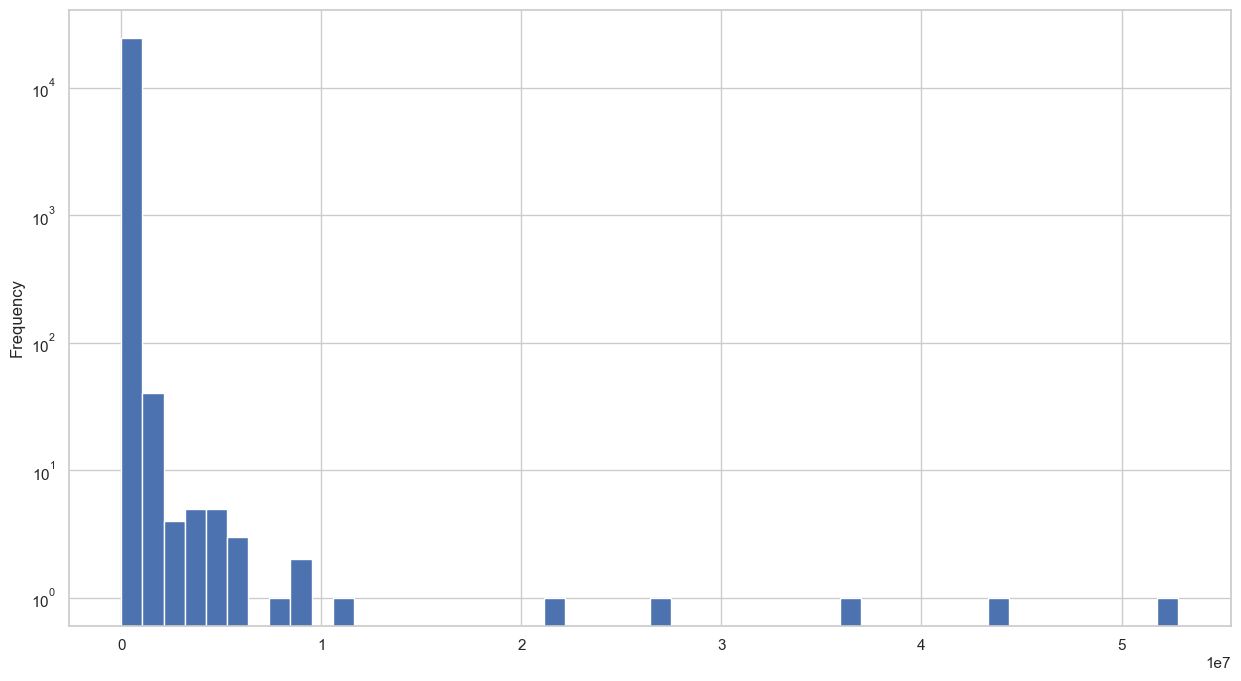

In [159]:

salaries_merged.Salary_annually_total_USD.plot.hist(bins = 50, log = True)


Removing salaries above 10 MN Dollars

In [160]:
salaries_merged = salaries_merged.query('Salary_annually_total_USD <1e7')

In [161]:
salaries_merged.Age.value_counts()

25-34         11041
35-44          8918
45-54          2904
18-24           926
55-64           880
65 or over       86
under 18          9
Name: Age, dtype: int64

In [162]:
salaries_merged.Experience_total.value_counts()

11 - 20 years       8664
8 - 10 years        4749
5-7 years           4250
21 - 30 years       3312
2 - 4 years         2511
31 - 40 years        785
1 year or less       383
41 years or more     110
Name: Experience_total, dtype: int64

In [163]:
expfield_condition = {
'5 - 7 years': salaries_merged['Experience_field'] == "5-7 years",
'0 - 1 years': salaries_merged['Experience_field'] == "1 year or less",
'41 - 50 years' : salaries_merged['Experience_field'] == "41 years or more",
}
exptotal_condition = {
'5 - 7 years': salaries_merged['Experience_total'] == "5-7 years",
'0 - 1 years': salaries_merged['Experience_total'] == "1 year or less",
'41 - 50 years' : salaries_merged['Experience_total'] == "41 years or more",
}

salaries_merged['Experience_field'] = pd.Series(np.select(
    list(expfield_condition.values()), 
    list(expfield_condition.keys()), 
    default=salaries_merged['Experience_field']
)).str.replace(" - ", "-").str.replace(" years", "")
salaries_merged['Experience_total'] = pd.Series(np.select(
    list(exptotal_condition.values()), 
    list(exptotal_condition.keys()), 
    default=salaries_merged['Experience_total']
)).str.replace(" - ", "-").str.replace(" years", "")

salaries_merged = salaries_merged.dropna(subset = ["Experience_field", "Experience_total"])

In [164]:
experience_field_temp = salaries_merged['Experience_field'].str.split(pat = "-", expand = True).astype("float").rename(columns={0:"lower", 1:"upper"})
salaries_merged['Experience_field_numeric'] = (experience_field_temp['lower'] + experience_field_temp['upper'])/2

In [165]:
experience_total_temp = salaries_merged['Experience_total'].str.split(pat = "-", expand = True).astype("float").rename(columns={0:"lower", 1:"upper"})
salaries_merged['Experience_total_numeric'] = (experience_total_temp['lower'] + experience_field_temp['upper'])/2

In [166]:
salaries_merged.Race.value_counts()

White                                                                                                                            20877
Asian or Asian American                                                                                                           1135
Black or African American                                                                                                          569
Another option not listed here or prefer not to answer                                                                             526
Hispanic, Latino, or Spanish origin                                                                                                473
Hispanic, Latino, or Spanish origin, White                                                                                         332
Asian or Asian American, White                                                                                                     301
Black or African American, White                       

In [167]:
salaries_merged.Gender.value_counts()

Woman                            19369
Man                               4458
Non-binary                         687
Other or prefer not to answer      243
Prefer not to answer                 1
Name: Gender, dtype: int64

In [168]:
gender_condition = {
'Other': salaries_merged['Gender'].isin(["Non-binary", "Other or prefer not to answer", "Prefer not to answer"]),
}

salaries_merged['Gender'] = np.select(
    list(gender_condition.values()), 
    list(gender_condition.keys()), 
    default=salaries_merged['Gender']
)

In [169]:
salaries_merged["Race_original"] = salaries_merged["Race"]
salaries_merged["Race"] = salaries_merged["Race"].str.split(pat = ",", n = 1, expand=True).iloc[:,0]

In [170]:
race_condition = {
'White': salaries_merged['Race'].isin(["White", "Native American or Alaska Native"]),
#'Black or African American': salaries_merged['Race'].isin([]),
}

salaries_merged['Race'] = np.select(
    list(race_condition.values()), 
    list(race_condition.keys()), 
    default=salaries_merged['Race']
)

In [171]:
salaries_merged = salaries_merged[salaries_merged.columns.drop(list(salaries_merged.filter(regex='original|context|Currency')))]

In [172]:
def dummy_regex_newcol(regex, df, column_series_name, new_column_name):
    new_df = df
    new_df[new_column_name] = df[column_series_name].apply(
        lambda x: bool(re.search(pattern=regex, string=str(x), flags = re.IGNORECASE)))
    return new_df

In [173]:
Job_title_words = pd.Series(" ".join(salaries_renamed.Job_title.to_list()).split(" "))
Job_title_words = Job_title_words[[len(i)>=4 for i in Job_title_words]]
Job_title_words.value_counts(ascending=True).tail(n = 25).index.to_list()

['Librarian',
 'Communications',
 'Business',
 'Developer',
 'Consultant',
 'Lead',
 'Product',
 'Data',
 'Development',
 'Executive',
 'Operations',
 'Research',
 'Program',
 'Project',
 'Marketing',
 'Coordinator',
 'Specialist',
 'Associate',
 'Software',
 'Analyst',
 'Assistant',
 'Engineer',
 'Director',
 'Senior',
 'Manager']

In [174]:
Job_title_words = [
 # 'Business',
 # 'Developer',
 'Lead',
 'Consultant',
 # 'Product',
 'Data',
 # 'Development',
 # 'Operations',
 'Executive',
 # 'Research',
 # 'Program',
 # 'Project',
 # 'Marketing',
 'Coordinator',
 'Specialist',
 'Senior',
 'Associate',
 'Software',
 'Analyst',
 'Assistant',
 'Engineer',
 'Director',
 
 'Manager']


In [175]:
salaries_position = salaries_merged
for word in Job_title_words:
    salaries_position = dummy_regex_newcol(regex = word, df = salaries_position, column_series_name = "Job_title", new_column_name = "Job_title_if_" + word)

In [176]:
salaries_position.columns.values

array(['Timestamp', 'Age', 'Industry', 'Job_title', 'Salary_annually',
       'Salary_extra_payments', 'Country', 'US_State', 'City',
       'Experience_total', 'Experience_field', 'Education_level',
       'Gender', 'Race', 'Date', 'Salary_annually_total',
       'Salary_annually_total_USD', 'Experience_field_numeric',
       'Experience_total_numeric', 'Job_title_if_Lead',
       'Job_title_if_Consultant', 'Job_title_if_Data',
       'Job_title_if_Executive', 'Job_title_if_Coordinator',
       'Job_title_if_Specialist', 'Job_title_if_Senior',
       'Job_title_if_Associate', 'Job_title_if_Software',
       'Job_title_if_Analyst', 'Job_title_if_Assistant',
       'Job_title_if_Engineer', 'Job_title_if_Director',
       'Job_title_if_Manager'], dtype=object)

In [177]:
Job_title_if_columns = salaries_position.columns.values[["Job_title_if_" in i for i in salaries_position.columns.values]]
salaries_position["Job_title_categorical"] = pd.Series(salaries_position[Job_title_if_columns].dot(Job_title_if_columns)).str.replace("Job_title_if_", " ").str.strip()

In [178]:
salaries_merged = salaries_merged.assign(
        Salary_per_experience_field=lambda x: x["Salary_annually_total_USD"] / x["Experience_field_numeric"]
    , Salary_per_experience_total=lambda x: x["Salary_annually_total_USD"] / x["Experience_total_numeric"]
    )

In [179]:


fips = {
    'Alabama': '01',
    'Alaska': '02',
    'Arizona': '04',
    'Arkansas': '05',
    'California': '06',
    'Colorado': '08',
    'Connecticut': '09',
    'Delaware': '10',
    'District of Columbia': '11',
    'Florida': '12',
    'Georgia': '13',
    'Hawaii': '15',
    'Idaho': '16',
    'Illinois': '17',
    'Indiana': '18',
    'Iowa': '19',
    'Kansas': '20',
    'Kentucky': '21',
    'Louisiana': '22',
    'Maine': '23',
    'Maryland': '24',
    'Massachusetts': '25',
    'Michigan': '26',
    'Minnesota': '27',
    'Mississippi': '28',
    'Missouri': '29',
    'Montana': '30',
    'Nebraska': '31',
    'Nevada': '32',
    'New Hampshire': '33',
    'New Jersey': '34',
    'New Mexico': '35',
    'New York': '36',
    'North Carolina': '37',
    'North Dakota': '38',
    'Ohio': '39',
    'Oklahoma': '40',
    'Oregon': '41',
    'Pennsylvania': '42',
    'Rhode Island': '44',
    'South Carolina': '45',
    'South Dakota': '46',
    'Tennessee': '47',
    'Texas': '48',
    'Utah': '49',
    'Vermont': '50',
    'Virginia': '51',
    'Washington': '53',
    'West Virginia': '54',
    'Wisconsin': '55',
    'Wyoming': '56'
}

# salaries_merged["US_State_FIPS"] = 
salaries_merged["US_State_FIPS"] = [fips[state] if state in fips.keys() else np.nan for state in salaries_merged['US_State']]




In [180]:

us_state_abbrev = {
    'Alabama': 'AL',
    'Alaska': 'AK',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'Delaware': 'DE',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Pennsylvania': 'PA',
    'Rhode Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virginia': 'VA',
    'Washington': 'WA',
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY',
}

# salaries_merged["US_State_FIPS"] = 
salaries_merged["US_State_abbr"] = [us_state_abbrev[state] if state in us_state_abbrev.keys() else np.nan for state in salaries_merged['US_State']]




Saving an Excel file

In [181]:
# from openpyxl import Workbook
#datatoexcel = pd.ExcelWriter('Salaries modified output.xlsx')
salaries_position.to_csv('Salaries modified output.csv', index = False)

### Summaries by job title

In [182]:
(salaries_position.groupby(["Job_title_categorical", "Country"])
 .agg({'Country':'size', 'Salary_annually_total_USD':'mean'}).round()
 .rename(columns={'Country':'Count','Salary_annually_total_USD':'Average_salary'}) 
                  .sort_values(by = ["Job_title_categorical", "Average_salary"], ascending=[True, False])
                  .reset_index(level=["Job_title_categorical", "Country"])
 .query("Job_title_categorical!='' & Count > 5" ).head(n = 50))


,Job_title_categorical,Country,Count,Average_salary
38,Analyst,Australia,10,111850.0
40,Analyst,United States,818,86419.0
42,Analyst,Canada,61,77902.0
47,Analyst,United Kingdom,51,42891.0
60,Assistant,Australia,17,73969.0
63,Assistant,United States,777,62175.0
64,Assistant,Canada,73,57884.0
69,Assistant,United Kingdom,68,25854.0
75,Assistant Director,United States,156,74813.0
80,Assistant Manager,Canada,7,70019.0


In [183]:
(salaries_position.query('Country == "United States"')
 .groupby(["Job_title_categorical"])
 .agg({'Job_title_categorical':'size', 'Salary_annually_total_USD':'mean'}).round()
 .rename(columns={'Job_title_categorical':'Count','Salary_annually_total_USD':'Average_salary'})
                  .sort_values(by = [ "Average_salary"], ascending=[ False])
                  .reset_index(level=["Job_title_categorical"])
 .query("Job_title_categorical!='' & Count > 5"))


,Job_title_categorical,Count,Average_salary
1,Senior Engineer Manager,10,405275.0
4,Software Manager,18,281309.0
5,Engineer Director,42,272406.0
6,Software Engineer Manager,17,267892.0
8,Software Engineer Director,10,232564.0
9,Senior Software Engineer Manager,10,227798.0
10,Engineer Manager,99,221564.0
11,Senior Software Engineer,214,203659.0
15,Software Engineer,451,186839.0
18,Lead Software Engineer,25,178317.0


In [184]:
(salaries_position.query('Country == "United States"')
 .groupby(["Industry", "Job_title"])
 .agg({'Job_title':'size', 'Salary_annually_total_USD':'mean'}).round()
 .rename(columns={'Job_title':'Count','Salary_annually_total_USD':'Average_salary'})
                  .sort_values(by = ["Count"], ascending = False)
                  .reset_index(level=["Industry", "Job_title"])
 .query("Job_title!='' & Count > 5")
 .head(n = 30)
)


,Industry,Job_title,Count,Average_salary
0,Computing&Tech,Software Engineer,236,185059.0
1,Computing&Tech,Senior Software Engineer,172,196065.0
2,Education,Teacher,134,63215.0
3,Law,Attorney,91,167155.0
4,Higher Education,Assistant Professor,87,88335.0
5,Computing&Tech,Product Manager,77,173218.0
6,Law,Associate Attorney,75,137830.0
7,Law,Paralegal,74,61791.0
8,Higher Education,Librarian,68,74174.0
9,Nonprofits,Executive Director,58,93544.0


### Summaries by Gender - Gender gap in salaries 

In [185]:
salaries_job_cat_gender = (salaries_position.query('Country == "United States"')
 .groupby(["Job_title_categorical", "Gender"])
 .agg({'Job_title_categorical':'size', 'Salary_annually_total_USD':'mean', "Experience_field_numeric":"mean"}).round()
 .rename(columns={'Job_title_categorical':'Count','Salary_annually_total_USD':'Average_salary', "Experience_field_numeric":"Average_experience_field"})
                  .sort_values(by = [ "Average_salary"], ascending=[ False])
                  .reset_index(level=["Gender", "Job_title_categorical"])
 .query("Job_title_categorical!='' & Count > 5").query('Gender!="Other"')
.pivot(index='Job_title_categorical', columns='Gender', values = ["Count", 'Average_salary', "Average_experience_field"])
.dropna())
salaries_job_cat_gender["Percantage_change"] = salaries_job_cat_gender[[('Average_salary','Man'), ('Average_salary','Woman')]].pct_change(axis = 1)[('Average_salary','Woman')]
salaries_job_cat_gender.sort_values(by = "Percantage_change")

Count         Average_salary            \
Gender                      Man   Woman            Man     Woman   
Job_title_categorical                                              
Data Manager               11.0    23.0       262623.0   77729.0   
Software Manager            6.0    12.0       506103.0  168912.0   
Consultant Senior          11.0    57.0       257087.0  115563.0   
Engineer Director          28.0    13.0       312473.0  191679.0   
Software                   57.0    48.0       165818.0  105996.0   
Senior Analyst             17.0   179.0       153804.0  101280.0   
Engineer Manager           56.0    40.0       254277.0  172396.0   
Manager                   455.0  2636.0       138368.0   96298.0   
Engineer                  267.0   413.0       154447.0  108403.0   
Data                       40.0    71.0       163501.0  118046.0   
Senior Manager             60.0   340.0       188464.0  136951.0   
Director                  222.0  1294.0       162481.0  118360.0   
Lead Engineer              23.0    17.0       163800.0  120712.0   
Senior Director            26.0    67.0       204976.0  155104.0   
Lead                       49.0   184.0       124326.0   95373.0   
Executive                  12.0    63.0       156828.0  120658.0   
Senior Engineer            70.0    68.0       174364.0  135529.0   
Associate                  65.0   529.0       125654.0   98817.0   
Assistant                  59.0   666.0        78110.0   61866.0   
Assistant Manager          11.0    60.0        71817.0   57175.0   
Senior Software Engineer  129.0    73.0       220906.0  178683.0   
Software Engineer         235.0   182.0       202534.0  164136.0   
Assistant Director         10.0   145.0        89590.0   74007.0   
Analyst                   137.0   662.0       101129.0   83820.0   
Senior                    102.0   504.0       133671.0  111101.0   
Senior Software            18.0     8.0       164219.0  137658.0   
Executive Director         11.0    91.0       127632.0  108100.0   
Data Senior Analyst         6.0    16.0       121408.0  107016.0   
Specialist                 78.0   696.0        73238.0   66448.0   
Consultant                 42.0   184.0       124414.0  113353.0   
Lead Software Engineer     15.0    10.0       177171.0  180035.0   
Coordinator                59.0   644.0        55385.0   56498.0   
Data Analyst               38.0    96.0        80679.0   83194.0   
Associate Director         13.0   178.0        99771.0  107637.0   
Senior Associate           14.0    87.0        93118.0  105259.0   
Data Senior                 9.0    16.0       142044.0  161609.0   

                         Average_experience_field       Percantage_change  
Gender                                        Man Woman                    
Job_title_categorical                                                      
Data Manager                                  9.0  10.0         -0.704028  
Software Manager                             14.0  12.0         -0.666250  
Consultant Senior                             7.0  12.0         -0.550491  
Engineer Director                            12.0  11.0         -0.386574  
Software                                     10.0  10.0         -0.360769  
Senior Analyst                                8.0   9.0         -0.341500  
Engineer Manager                             10.0  13.0         -0.322015  
Manager                                      10.0  10.0         -0.304044  
Engineer                                     10.0   9.0         -0.298122  
Data                                         12.0   8.0         -0.278011  
Senior Manager                               11.0  10.0         -0.273331  
Director                                     10.0  11.0         -0.271546  
Lead Engineer                                12.0  13.0         -0.263053  
Senior Director                               8.0  14.0         -0.243307  
Lead                                         11.0  10.0         -0.232880  
Execu

In [186]:
salaries_job_cat_gender = (salaries_position.query('Country == "United States"')
 .groupby(["Job_title_categorical", "Gender"])
 .agg({'Job_title_categorical':'size', 'Salary_annually_total_USD':'mean', "Experience_field_numeric":"mean"}).round(2)
 .rename(columns={'Job_title_categorical':'Count','Salary_annually_total_USD':'Average_salary', "Experience_field_numeric":"Average_experience_field"})
                  .sort_values(by = [ "Average_salary"], ascending=[ False])
                  .reset_index(level=["Gender", "Job_title_categorical"])
 .query("Job_title_categorical!='' & Count > 5").query('Gender!="Other"')
#.pivot(index='Job_title_categorical', columns='Gender', values = ["Count", 'Average_salary', "Average_experience_field"])
.dropna())
#salaries_job_cat_gender["Percantage_change"] = salaries_job_cat_gender[[('Average_salary','Man'), ('Average_salary','Woman')]].pct_change(axis = 1)[('Average_salary','Woman')]
salaries_job_cat_gender#.sort_values(by = "Percantage_change")

,Job_title_categorical,Gender,Count,Average_salary,Average_experience_field
3,Software Manager,Man,6,506102.83,14.00
4,Senior Engineer Manager,Woman,6,450278.16,11.75
8,Engineer Director,Man,28,312472.73,11.66
11,Software Engineer Manager,Man,12,289250.83,11.12
14,Data Manager,Man,11,262622.67,8.68
15,Consultant Senior,Man,11,257086.65,6.95
17,Engineer Manager,Man,56,254276.75,9.75
21,Software Engineer Director,Man,8,228917.69,8.06
23,Senior Software Engineer,Man,129,220905.58,10.86
25,Senior Director,Man,26,204976.48,7.79


In [187]:
salaries_job_cat_country = (salaries_position#.query('Country == "United States"')
 .groupby(["Job_title_categorical", "Country"])
 .agg({'Job_title_categorical':'size', 'Salary_annually_total_USD':'mean',}).round()
 .rename(columns={'Job_title_categorical':'Count','Salary_annually_total_USD':'Average_salary'})
                  .sort_values(by = [ "Average_salary"], ascending=[ False])
                  .reset_index(level=["Country", "Job_title_categorical"])
 .query("Job_title_categorical!='' & Count > 5")
# .pivot(index='Job_title_categorical', columns='Gender', values = ['Average_salary', "Average_experience_field"]).drop(columns = "Other")
# .dropna()
                          )
# salaries_job_cat_gender["Percantage_change"] = salaries_job_cat_gender[['Man', 'Woman']].pct_change(axis = 1)['Woman']
salaries_job_cat_country.sort_values(by = "Job_title_categorical").head(n = 25)

,Job_title_categorical,Country,Count,Average_salary
358,Analyst,Canada,61,77902.0
329,Analyst,United States,818,86419.0
547,Analyst,United Kingdom,51,42891.0
223,Analyst,Australia,10,111850.0
376,Assistant,Australia,17,73969.0
453,Assistant,United States,777,62175.0
479,Assistant,Canada,73,57884.0
595,Assistant,United Kingdom,68,25854.0
370,Assistant Director,United States,156,74813.0
474,Assistant Manager,United States,77,58366.0


In [188]:
salaries_job_cat_country

,Job_title_categorical,Country,Count,Average_salary
55,Senior Engineer Manager,United States,10,405275.0
77,Software Manager,United States,18,281309.0
79,Engineer Director,United States,42,272406.0
80,Software Engineer Manager,United States,17,267892.0
86,Software Engineer Director,United States,10,232564.0
...,...,...,...,...
568,Data Analyst,United Kingdom,11,35979.0
569,Assistant Manager,United Kingdom,13,35906.0
579,Executive,United Kingdom,25,32042.0
585,Coordinator,United Kingdom,18,30267.0


In [189]:
salaries_industry_country = (salaries_position.query('Country == "United States"')
 .groupby(["Industry", "Country"])
 .agg({'Industry':'size', 'Salary_annually_total_USD':'mean','Salary_annually_total_USD':'std'}).round()
 .rename(columns={'Industry':'Count','Salary_annually_total_USD':'Average_salary'})
                  .sort_values(by = [ "Average_salary"], ascending=[ False])
                  .reset_index(level=["Country", "Industry"])
 .query("Industry!='' & Count > 40")
# .pivot(index='Job_title_categorical', columns='Gender', values = ['Average_salary', "Average_experience_field"]).drop(columns = "Other")
# .dropna()
                          )
salaries_industry_country

,Industry,Country,Count,Average_salary
0,Entertainment,United States,185,279789.0
1,Art Design,United States,264,222919.0
3,Computing&Tech,United States,3307,123052.0
4,Law,United States,903,107693.0
5,Finance,United States,1323,104297.0
7,Sales,United States,208,87538.0
8,Health,United States,1660,86997.0
9,Business&Consulting,United States,627,81885.0
10,Biotech&Pharma,United States,171,70926.0
11,Marketing Advertising Pr,United States,823,63655.0


### Summaries by Race

In [ ]:
salaries_job_cat_race = (salaries_position.query('Country == "United States"')
 .groupby(["Job_title_categorical",  "Industry","Race"])
 .agg({'Race':'size', 'Salary_annually_total_USD':'mean',"Experience_field_numeric":'mean'}).round(2)
 .rename(columns={'Race':'Count','Salary_annually_total_USD':'Average_salary', "Experience_field_numeric":"Average_experience_field"})
                  .sort_values(by = [ "Average_salary"], ascending=[ False])
                  .reset_index(level=["Job_title_categorical", "Industry", "Race"])
 .query("Job_title_categorical!='' & Count > 10").assign(Average_Salary_per_experience_field = lambda x:  round(x['Average_salary'] / x['Average_experience_field'], 2))
# .pivot(index='Job_title_categorical', columns='Race', values = ['Average_salary', "Average_experience_field"])#.drop(columns = "Other")
# .dropna()
                         
                

In [314]:
salaries_job_cat_race_to_merge = (salaries_job_cat_race.sort_values(by = ["Job_title_categorical", "Industry"])
        .query('Race != "White"')[["Job_title_categorical", "Industry"]]).drop_duplicates()

In [327]:
(salaries_job_cat_race[["Job_title_categorical",	"Industry",	"Race",	"Average_Salary_per_experience_field"]]
    .pivot(index=["Job_title_categorical",	"Industry"],
           columns="Race", values="Average_Salary_per_experience_field")
    .sort_index(level=[1,0]).reset_index().drop(columns = "Another option not listed here or prefer not to answer").dropna(thresh=1)
    )

Race,Job_title_categorical,Industry,Asian or Asian American,Black or African American,Hispanic,White
0,Manager,Agriculture,NaN,NaN,NaN,8352.59
1,Director,Art Design,NaN,NaN,NaN,8965.97
2,Manager,Art Design,NaN,NaN,NaN,9364.24
3,Senior,Art Design,NaN,NaN,NaN,8535.62
4,Associate Director,Biotech&Pharma,NaN,NaN,NaN,16430.09
...,...,...,...,...,...,...
193,Director,Transport Or Logistics,NaN,NaN,NaN,15936.69
194,Manager,Transport Or Logistics,NaN,NaN,NaN,8699.93
195,Specialist,Transport Or Logistics,NaN,NaN,NaN,6018.79
196,Analyst,Utilities Telecommunications,NaN,NaN,NaN,7724.32


### Plot of density by Industry

In [191]:
top10_industries = salaries_merged.Industry.isin(salaries_merged.Industry.value_counts().head(n = 10).index.tolist())

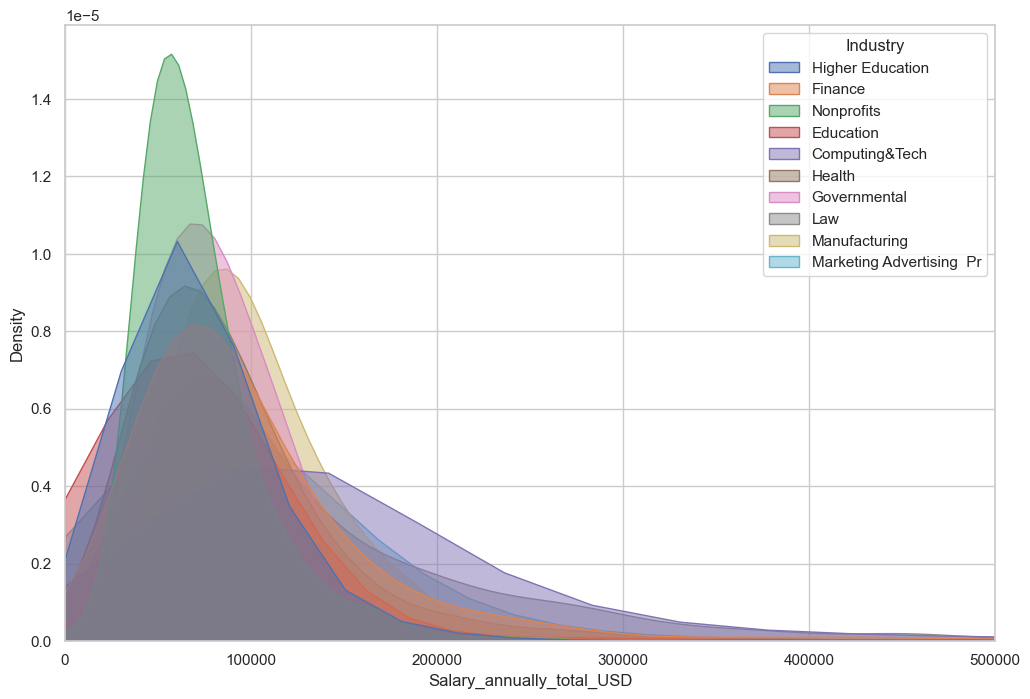

In [192]:
# libraries
import seaborn as sns
import matplotlib.pyplot as plt


# Set figure size for the notebook
plt.rcParams["figure.figsize"]=12,8

# set seaborn whitegrid theme
sns.set(style="whitegrid")

# Without transparency
sns.kdeplot(data=salaries_merged[top10_industries], x="Salary_annually_total_USD", hue="Industry",
            cut=0, fill=True, common_norm=False, alpha=.5)
plt.xlim(0, .5e6)
plt.show()

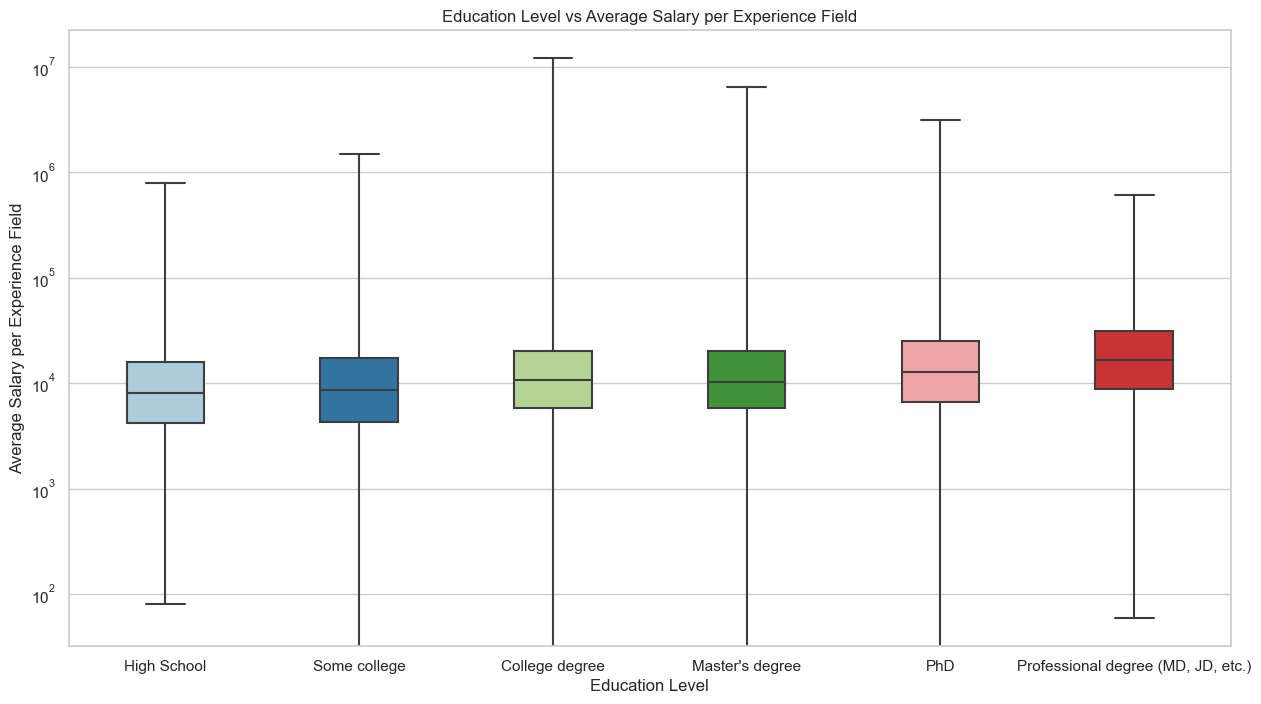

In [193]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (15, 8)
sns.set(style="whitegrid")
sns.set(context="notebook", style="whitegrid")

# salaries_group_education = salaries_merged.groupby("Education_level").agg(
#     {
#         "Salary_annually_total_USD": "sum",
#         "Experience_field_numeric": "sum",
#     }
# )
# salaries_group_education = salaries_group_education.assign(
#     Salary_per_experience_field=lambda x: x["Salary_annually_total_USD"] / x["Experience_field_numeric"]
# )

g = sns.boxplot(
    data=salaries_merged.assign(
        Salary_per_experience_field=lambda x: x["Salary_annually_total_USD"] / x["Experience_field_numeric"]
    ),
    x="Education_level",
    y="Salary_per_experience_field",
    whis=np.inf,
    order=[
        "High School",
        "Some college",
        "College degree",
        "Master's degree",
        "PhD",
        "Professional degree (MD, JD, etc.)",
    ],
    palette="Paired",
    width=0.40,
)

# g.despine(left=True)
g.set_xlabel("Education Level")
g.set_ylabel("Average Salary per Experience Field")
plt.yscale("log")

plt.title("Education Level vs Average Salary per Experience Field")
plt.show()


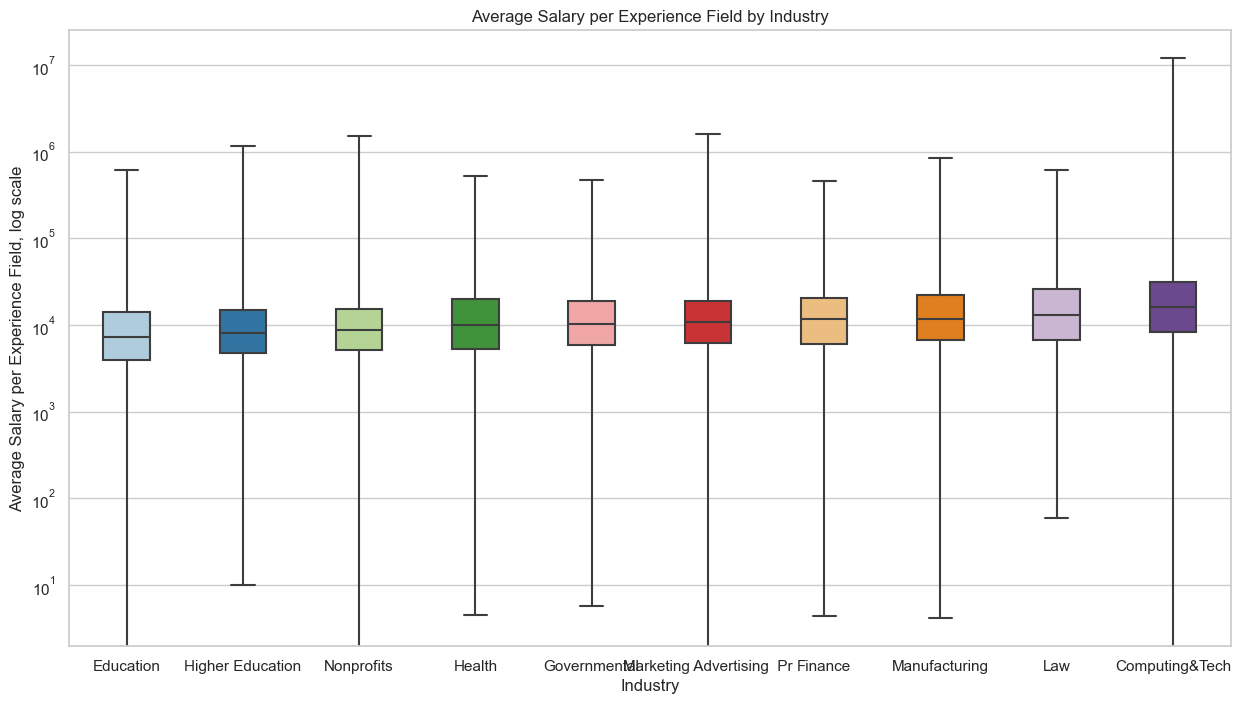

In [194]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (15, 8)
sns.set(style="whitegrid")
sns.set(context="notebook", style="whitegrid")

order_industries = salaries_merged[top10_industries].groupby("Industry")["Salary_per_experience_field"].median().sort_values(ascending = True).index


g = sns.boxplot(
    data=salaries_merged[top10_industries],
    x="Industry",
    y="Salary_per_experience_field",
    whis=np.inf,
    order=order_industries,
    palette="Paired",
    width=0.40,
)

# g.despine(left=True)
g.set_xlabel("Industry")
g.set_ylabel("Average Salary per Experience Field, log scale")
plt.yscale("log")

plt.title("Average Salary per Experience Field by Industry")
plt.show()


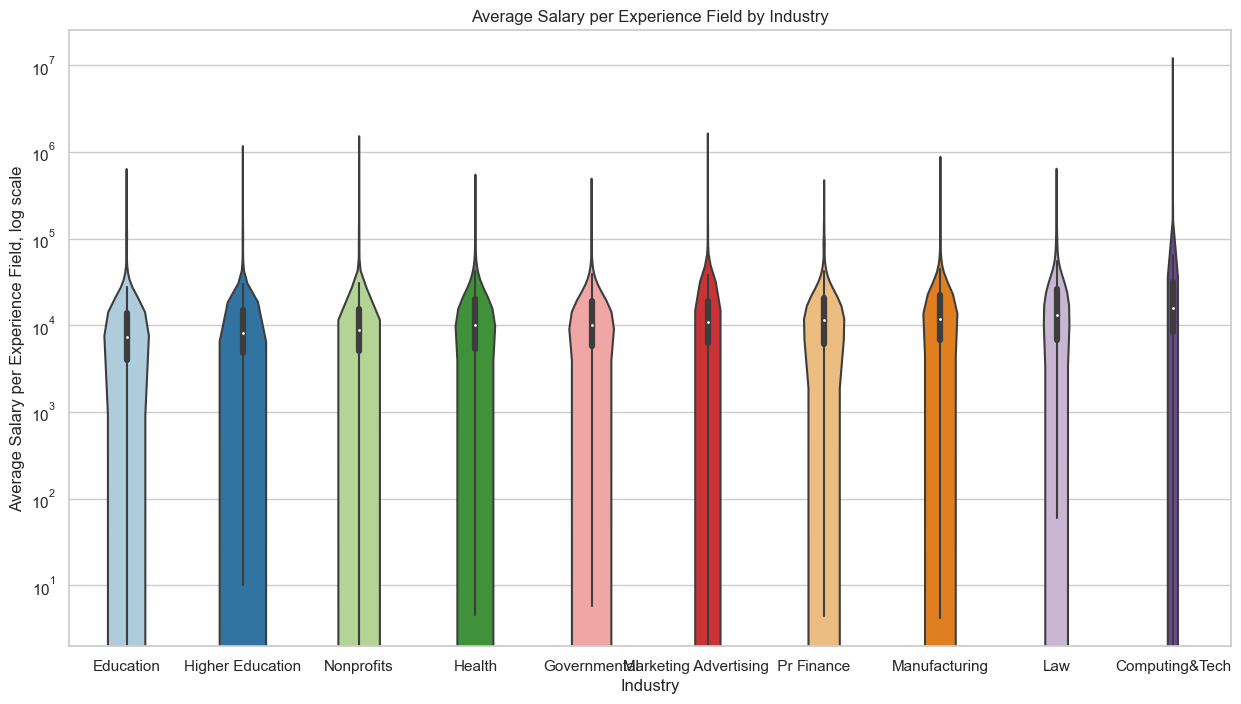

In [195]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (15, 8)
sns.set(style="whitegrid")
sns.set(context="notebook", style="whitegrid")

order_industries = salaries_merged[top10_industries].groupby("Industry")["Salary_per_experience_field"].median().sort_values(ascending = True).index


g = sns.violinplot(
    data=salaries_merged[top10_industries],
    x="Industry",
    y="Salary_per_experience_field",
    order=order_industries,
    palette="Paired",
    width=0.40,
)

# g.despine(left=True)
g.set_xlabel("Industry")
g.set_ylabel("Average Salary per Experience Field, log scale")
plt.yscale("log")

plt.title("Average Salary per Experience Field by Industry")
plt.show()


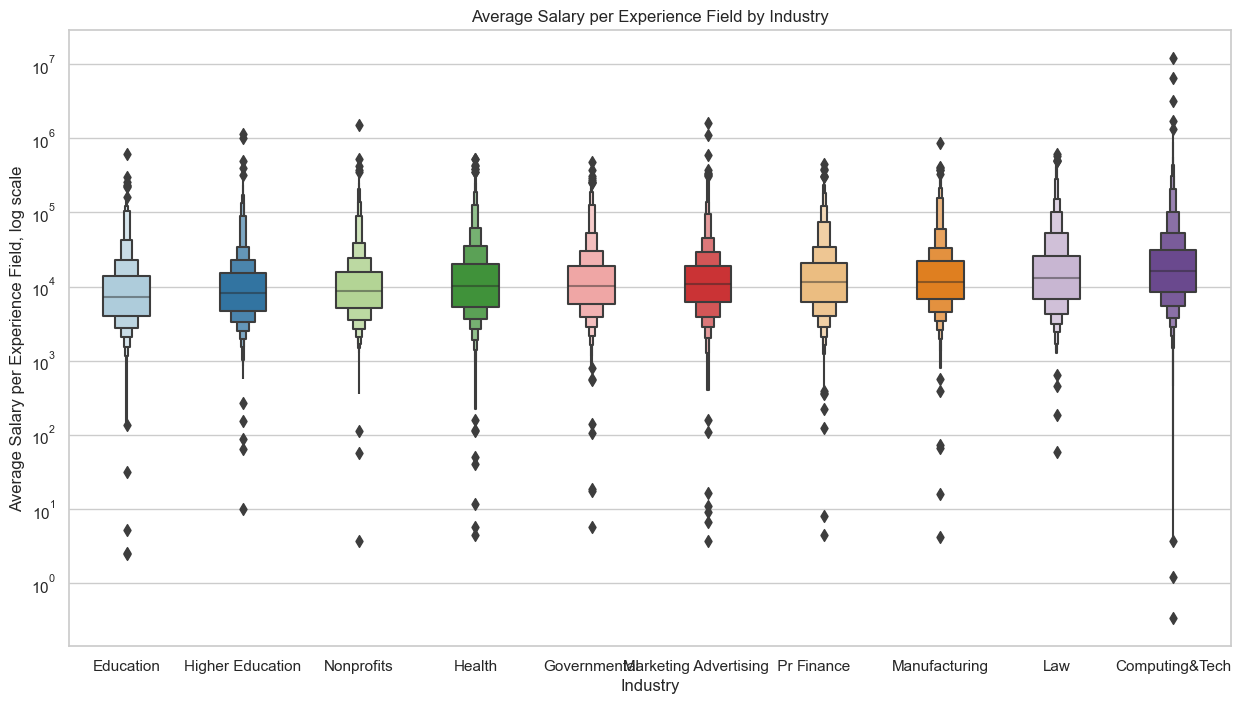

In [196]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (15, 8)
sns.set(style="whitegrid")
sns.set(context="notebook", style="whitegrid")

order_industries = salaries_merged[top10_industries].groupby("Industry")["Salary_per_experience_field"].median().sort_values(ascending = True).index


g = sns.boxenplot(
    data=salaries_merged[top10_industries],
    x="Industry",
    y="Salary_per_experience_field",
    order=order_industries,
    palette="Paired",
    width=0.40,
)

# g.despine(left=True)
g.set_xlabel("Industry")
g.set_ylabel("Average Salary per Experience Field, log scale")
plt.yscale("log")

plt.title("Average Salary per Experience Field by Industry")
plt.show()


### Map value counts for United states

In [197]:
import chart_studio.plotly as py
import plotly.figure_factory as ff


import pandas as pd

# create a sample dataframe with state and value_counts columns
salaries_group_US_state = (salaries_merged[salaries_merged.Country == "United States"].groupby(["US_State", "US_State_FIPS", "US_State_abbr"]).mean()
                           ["Salary_per_experience_field"].reset_index()
                           .rename(columns={"Salary_per_experience_field": "Average_Salary_per_Experience_Field"}))
colorscale = ["#f7fbff","#ebf3fb","#deebf7","#d2e3f3","#c6dbef","#b3d2e9","#9ecae1",
              "#85bcdb","#6baed6","#57a0ce","#4292c6","#3082be","#2171b5","#1361a9",
              "#08519c","#0b4083","#08306b"]
endpts = list(np.linspace(1, 12, len(colorscale) - 1))

fips = salaries_group_US_state['US_State_FIPS'].tolist()
values = salaries_group_US_state['Average_Salary_per_Experience_Field'].tolist()
# print(salaries_group_US_state)

          US_State US_State_FIPS US_State_abbr  \
0          Alabama            01            AL   
1           Alaska            02            AK   
2          Arizona            04            AZ   
3         Arkansas            05            AR   
4       California            06            CA   
5         Colorado            08            CO   
6      Connecticut            09            CT   
7         Delaware            10            DE   
8          Florida            12            FL   
9          Georgia            13            GA   
10          Hawaii            15            HI   
11           Idaho            16            ID   
12        Illinois            17            IL   
13         Indiana            18            IN   
14            Iowa            19            IA   
15          Kansas            20            KS   
16        Kentucky            21            KY   
17       Louisiana            22            LA   
18           Maine            23            ME   


In [223]:
import plotly.express as px
import pandas as pd
vars_group_US = ["Salary_per_experience_field", "Salary_annually_total_USD", "Salary_per_experience_total" ]
# Create a DataFrame with state names and values
salaries_group_US_state = (
    salaries_merged[salaries_merged.Country == "United States"]
    .groupby(["US_State", "US_State_FIPS", "US_State_abbr"])
    .mean()[vars_group_US]
    .reset_index()
    .rename(columns= dict(zip(vars_group_US, ["Average_" + i for i in  vars_group_US])))
)
salaries_group_US_state.head()

,US_State,US_State_FIPS,US_State_abbr,Average_Salary_per_experience_field,Average_Salary_annually_total_USD,Average_Salary_per_experience_total
0,Alabama,01,AL,21250.260561,108554.885684,16204.232509
1,Alaska,02,AK,19997.376630,83083.014734,14049.770516
2,Arizona,04,AZ,16606.935109,87739.177295,11814.816408
3,Arkansas,05,AR,16899.170141,85806.481452,13233.653006
4,California,06,CA,32039.588137,139758.166238,21327.658836


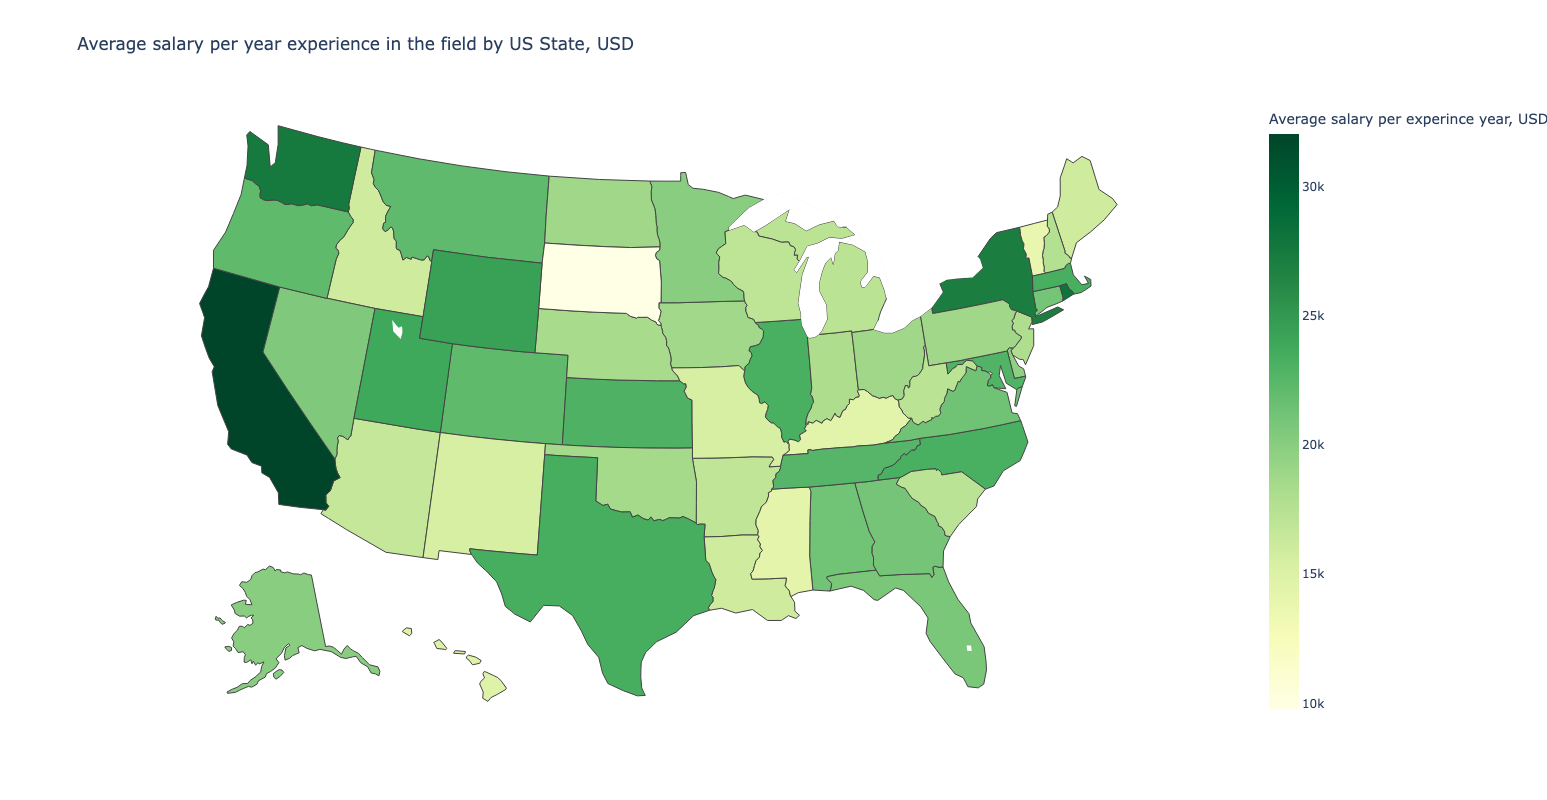

In [254]:
# Create the map plot
fig = px.choropleth(
    salaries_group_US_state,
    locations="US_State_abbr",
    locationmode="USA-states",
    scope="usa",
    color="Average_Salary_per_experience_field",
    labels={"Average_Salary_per_experience_field": "Average salary per experince year, USD", "US_State": "State"},
    # range_color=(0, max(salaries_group_US_state.Average_Salary_per_Experience_Field)),
    title="Values by State",
    color_continuous_scale="YlGn",
    hover_name = "US_State",
    hover_data = [	"Average_Salary_per_experience_field"	]
    # range_color=(0, max(salaries_group_US_state.US_State_abbr))
)

fig = fig.update_layout(
    
    # margin={"r":0,"t":0,"l":0,"b":0},
    legend=dict(
        title="Legend title",
        orientation="h",
        yanchor="bottom",
        y=1.02,
        xanchor="right",
        x=1
    ),
    title="Average salary per year experience in the field by US State, USD",
    height=800,
    width=1200,
)

fig.show()
# from dash import Dash, dcc, htmlc

# app = dash.Dash()
# app.layout = html.Div([
#     dcc.Graph(figure=fig)
# ])

# app.run_server(debug=True, use_reloader=False)  # Turn off reloader if inside Jupyter

In [ ]:
# from dash import Dash, dcc, html, Input, Output
# import plotly.express as px

# app = Dash(__name__)


# app.layout = html.Div([
#     html.H4('AskManagerSalary survey analysis for the United States'),
#     html.P("Select a metric:"),
#     dcc.RadioItems(
#         id='choropleth-maps-x-us', 
#         options=vars_group_US,
#         value="Coderre",
#         inline=True
#     ),
#     dcc.Graph(id="choropleth-maps-x-graph"),
# ])


# @app.callback(
#     Output("choropleth-maps-x-graph", "figure"), 
#     Input("choropleth-maps-x-us", "value"))
# def display_choropleth(metric):
#     df = salaries_group_US_state#px.data.election() # replace with your own data source
#     #geojson = px.data.election_geojson()
#     fig = px.choropleth(
#         df, #geojson=geojson, 
#         color=metric,
#         locations="US_State_abbr",
#     locationmode="USA-states",
#     scope="usa", featureidkey="US_State_abbr",
#         projection="mercator"#, range_color=[0, 6500]
#     )
#     fig.update_geos(fitbounds="locations", visible=False)
#     fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
#     return fig


# if __name__ == "__main__":
#     app.run(debug=True)


In [238]:
salaries_group_country = pd.DataFrame(salaries_merged.Country.value_counts()).rename(columns={"Country":"Counts"}).reset_index().rename(columns={"index":"Country"})
# salaries_group_country


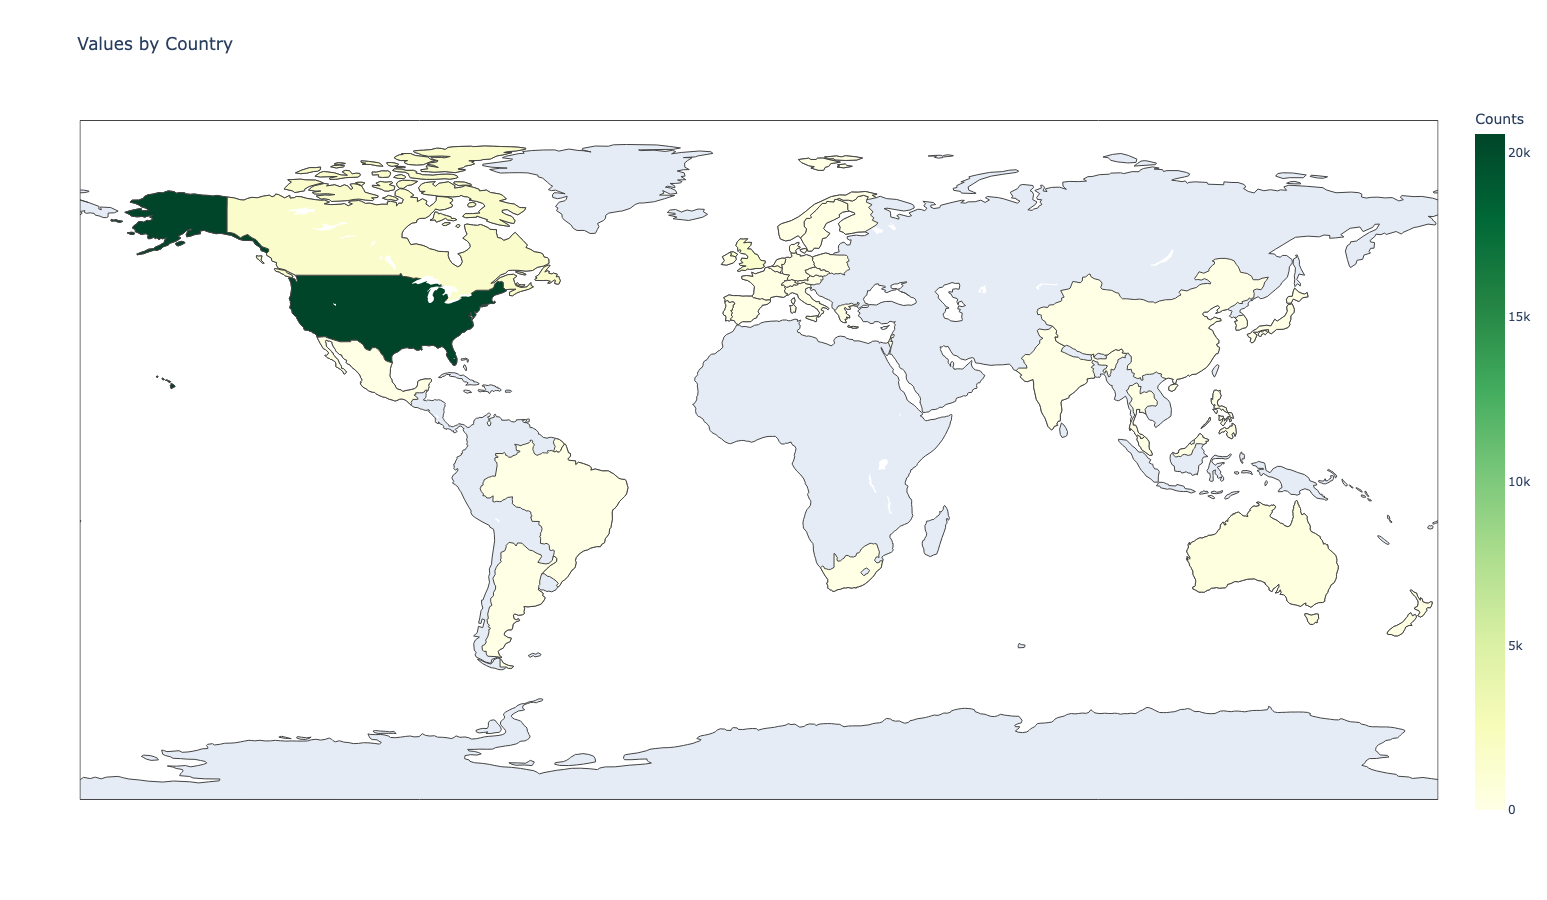

In [239]:
fig = px.choropleth(salaries_group_country, 
                    locations='Country', 
                    locationmode='country names',
                    color='Counts', 
                    title='Values by Country', 
                    color_continuous_scale='YlGn' 
                    # range_color=(0, max(salaries_group_world.Country))
                   )

fig.update_layout(
    height=900,
    width=1000
)
fig.show()